In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data  = pd.read_csv('Apple-Fitness-Data.csv')
print(data.to_string())

           Date       Time  Step Count  Distance  Energy Burned  Flights Climbed  Walking Double Support Percentage  Walking Speed
0    2023-03-21  16:01:23           46   0.02543         14.620                3                              0.304          3.060
1    2023-03-21  16:18:37          645   0.40041         14.722                3                              0.309          3.852
2    2023-03-21  16:31:38           14   0.00996         14.603                4                              0.278          3.996
3    2023-03-21  16:45:37           13   0.00901         14.811                3                              0.278          5.040
4    2023-03-21  17:10:30           17   0.00904         15.153                3                              0.281          5.184
5    2023-03-21  18:14:45            8   0.00560         14.958                3                              0.301          5.040
6    2023-03-21  19:02:31          564   0.36089         13.709                3   

In [8]:
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [11]:
print(data.isnull().sum())  #checking for null values

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64


In [12]:
data.tail() # check last values

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860
148,2023-04-01,17:47:07,1081,0.67835,14.131,1,0.265,5.040


In [13]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               149 non-null    object 
 1   Time                               149 non-null    object 
 2   Step Count                         149 non-null    int64  
 3   Distance                           149 non-null    float64
 4   Energy Burned                      149 non-null    float64
 5   Flights Climbed                    149 non-null    int64  
 6   Walking Double Support Percentage  149 non-null    float64
 7   Walking Speed                      149 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 9.4+ KB


In [14]:
data.nunique() # checking unique values

Date                                  12
Time                                 148
Step Count                           118
Distance                             146
Energy Burned                        137
Flights Climbed                        9
Walking Double Support Percentage     71
Walking Speed                         81
dtype: int64

In [15]:
(data.isnull().sum()/len(data))*100   # % of null values

Date                                 0.0
Time                                 0.0
Step Count                           0.0
Distance                             0.0
Energy Burned                        0.0
Flights Climbed                      0.0
Walking Double Support Percentage    0.0
Walking Speed                        0.0
dtype: float64

In [16]:
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [59]:
fig = px.line(data,x="Time",y="Step Count",title='step count over time')
fig.show()

In [23]:
data['Distance'] = data['Distance'].round(2)
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.03,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.01,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.01,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.01,15.153,3,0.281,5.184


In [60]:
fig2=px.line(data,x="Distance",y="Step Count",title='step count vs distance')
fig2.show()

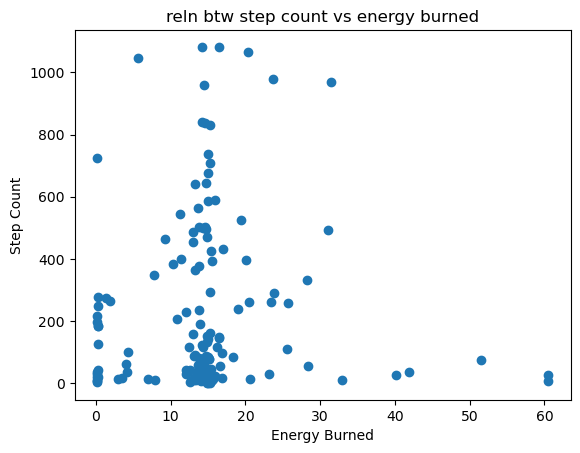

In [29]:
x = data["Energy Burned"]
y = data["Step Count"]
plt.scatter(x, y)
plt.xlabel('Energy Burned')
plt.ylabel('Step Count')
plt.title('reln btw step count vs energy burned')
plt.show()   

In [33]:
# Convert 'Date' to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the average step count per day
avg_step_count_per_day = data.groupby(data['Date'].dt.date)["Step Count"].mean()

# Fill the 'avg_step_count_per_day' column with the calculated averages
data['avg_step_count_per_day'] = data['Date'].dt.date.map(avg_step_count_per_day)

# Round the values in the 'avg_step_count_per_day' column to two decimal places
data['avg_step_count_per_day'] = data['avg_step_count_per_day'].round(2)

# Display the updated DataFrame
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,avg_step_count_per_day
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060,137.64
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852,137.64
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996,137.64
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040,137.64
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184,137.64


In [45]:
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,avg_step_count_per_day
0,2023-03-22,16:01:23,46,0.02543,14.620,3,0.304,3.060,137.64
1,2023-03-22,16:18:37,645,0.40041,14.722,3,0.309,3.852,137.64
2,2023-03-22,16:31:38,14,0.00996,14.603,4,0.278,3.996,137.64
3,2023-03-22,16:45:37,13,0.00901,14.811,3,0.278,5.040,137.64
4,2023-03-22,17:10:30,17,0.00904,15.153,3,0.281,5.184,137.64


In [40]:
fig3 = px.bar(data,x=data['Date'],y='avg_step_count_per_day',title='avg_step_count_per_day')

fig3.show()

In [50]:
dist_covered_per_setp_count = data['Distance']/data['Step Count']
print(dist_covered_per_setp_count)

0      0.000553
1      0.000621
2      0.000711
3      0.000693
4      0.000532
         ...   
144    0.000675
145    0.000551
146    0.000675
147    0.000662
148    0.000628
Length: 149, dtype: float64


In [53]:
data['dist_covered_per_step_count'] = dist_covered_per_setp_count

In [55]:
data.drop('dist_covered_per_setp_count', axis=1, inplace=True)

In [56]:
data.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed,avg_step_count_per_day,dist_covered_per_step_count
0,2023-03-22,16:01:23,46,0.02543,14.620,3,0.304,3.060,137.64,0.000553
1,2023-03-22,16:18:37,645,0.40041,14.722,3,0.309,3.852,137.64,0.000621
2,2023-03-22,16:31:38,14,0.00996,14.603,4,0.278,3.996,137.64,0.000711
3,2023-03-22,16:45:37,13,0.00901,14.811,3,0.278,5.040,137.64,0.000693
4,2023-03-22,17:10:30,17,0.00904,15.153,3,0.281,5.184,137.64,0.000532


In [57]:
fig4 = px.line(data, x="Time",
               y="dist_covered_per_step_count",
               title="Walking Efficiency Over Time")
fig4.show()

In [58]:
#--insights gained--#

#Performed exploratory data analysis (EDA) to gain insights into the distribution, trends, and patterns of each fitness metric.
#Created visualizations to depict how different metrics vary over time, across different time intervals, or in relation to one another.
#Analyzed how step count, distance, energy burned, and other metrics correlate with each other.
#Identifed potential patterns in walking efficiency, energy expenditure, and the relationship between step count and walking speed.